Iris dataset classificaition accuracy: 1.00


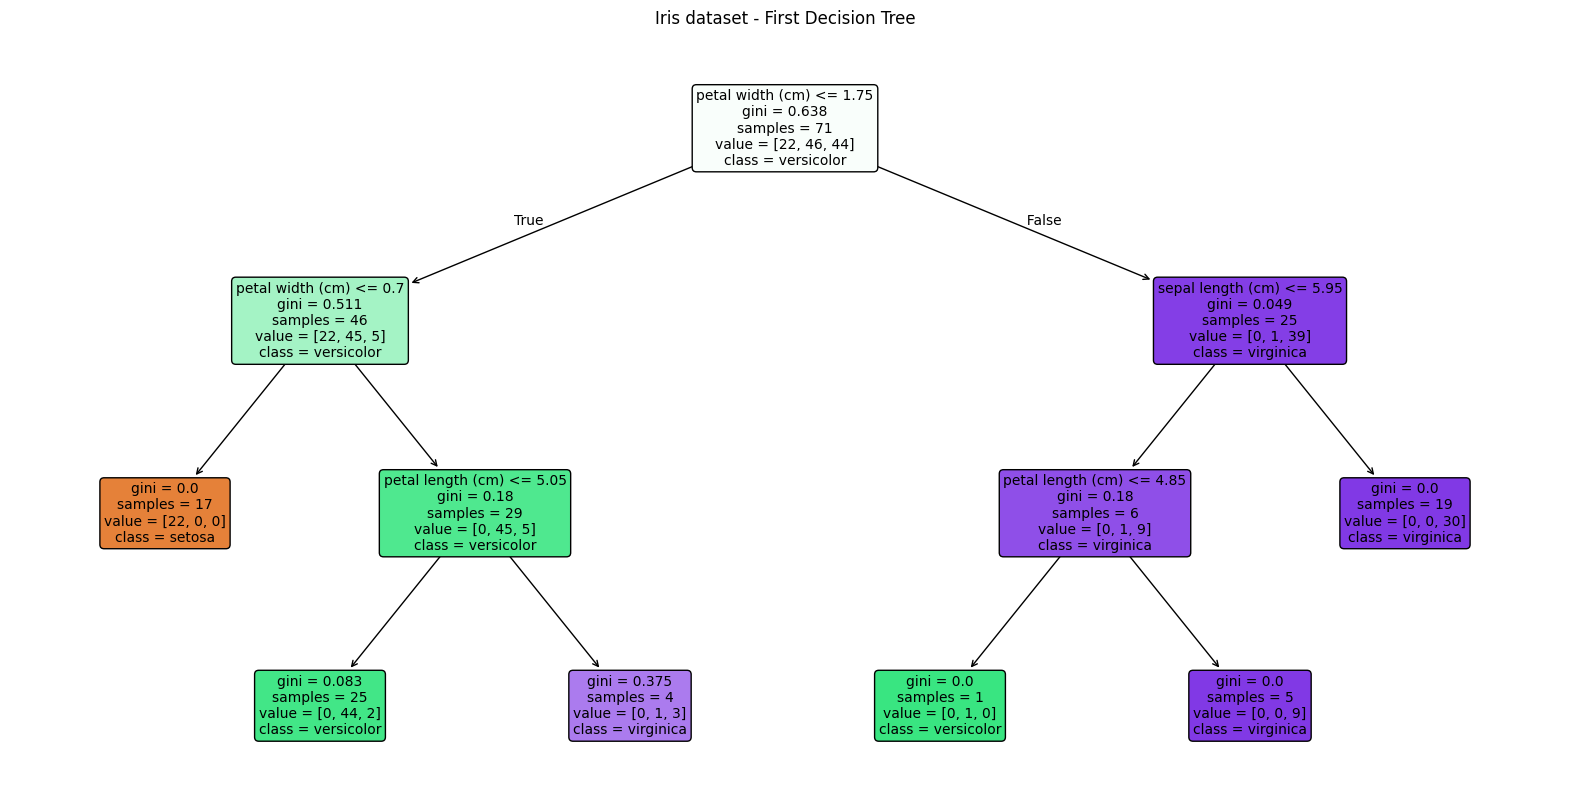

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error

iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names_iris = iris.feature_names
class_names_iris = iris.target_names

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, random_state=42)
rf_clf_iris = RandomForestClassifier(n_estimators=5, max_depth=3, random_state=42)
rf_clf_iris.fit(X_train_iris, y_train_iris)
y_pred_iris = rf_clf_iris.predict(X_test_iris)
accuracy_iris = accuracy_score(y_test_iris, y_pred_iris)
print(f"Iris dataset classificaition accuracy: {accuracy_iris:.2f}")

plt.figure(figsize=(20, 10))
plot_tree(rf_clf_iris.estimators_[0], feature_names=feature_names_iris, class_names=class_names_iris, filled=True, rounded=True, fontsize=10)
plt.title("Iris dataset - First Decision Tree")
plt.show()

Cancer dataset classificaition accuracy: 0.96


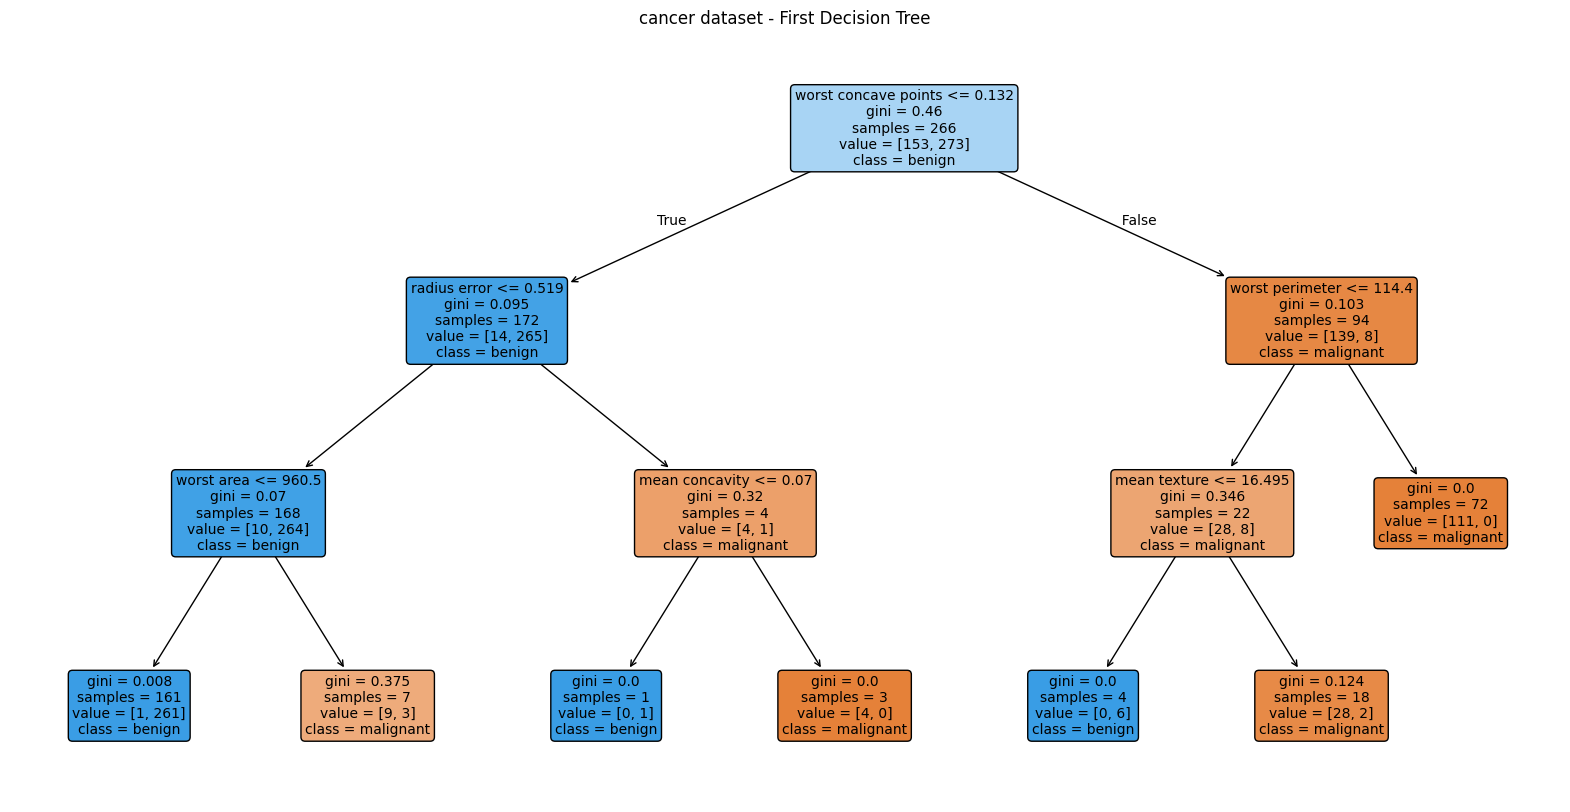

In [ ]:
cancer = datasets.load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target
feature_names_cancer = cancer.feature_names
class_names_cancer = cancer.target_names

X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, random_state=42)
rf_clf_cancer = RandomForestClassifier(n_estimators=5, max_depth=3, random_state=42)
rf_clf_cancer.fit(X_train_cancer, y_train_cancer)
y_pred_cancer = rf_clf_cancer.predict(X_test_cancer)
accuracy_cancer = accuracy_score(y_test_cancer, y_pred_cancer)
print(f"Cancer dataset classificaition accuracy: {accuracy_cancer:.2f}")

plt.figure(figsize=(20, 10))
plot_tree(rf_clf_cancer.estimators_[0], feature_names=feature_names_cancer, class_names=class_names_cancer, filled=True, rounded=True, fontsize=10)
plt.title("cancer dataset - First Decision Tree")
plt.show()

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_csv("titanic(1).csv")

# Preprocess
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
df['Age'].fillna(df['Age'].median(), inplace=True)

# Encode categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# Split features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

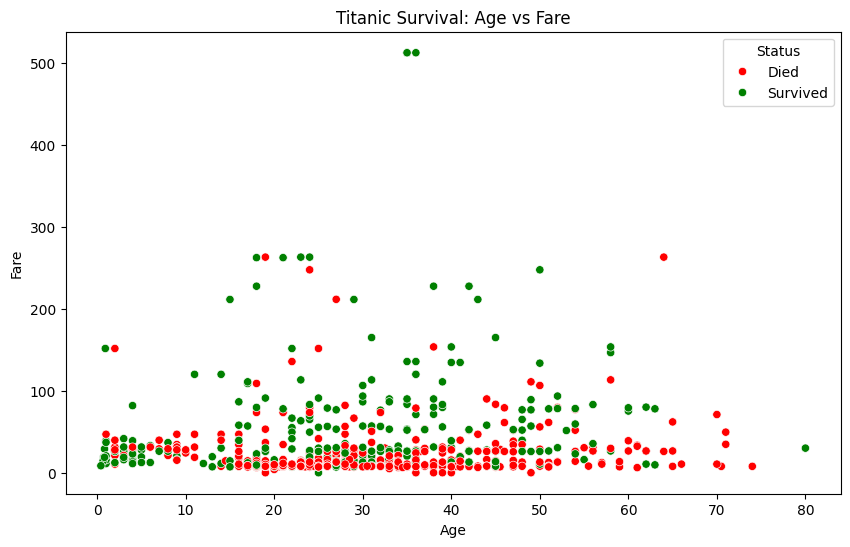

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")

titanic = titanic.dropna(subset=['age', 'fare'])

titanic['survival_status'] = titanic['survived'].map({0: 'Died', 1: 'Survived'})

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=titanic,
    x='age',
    y='fare',
    hue='survival_status',
    palette={'Died': 'red', 'Survived': 'green'}
)

plt.title('Titanic Survival: Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Status')

plt.show()


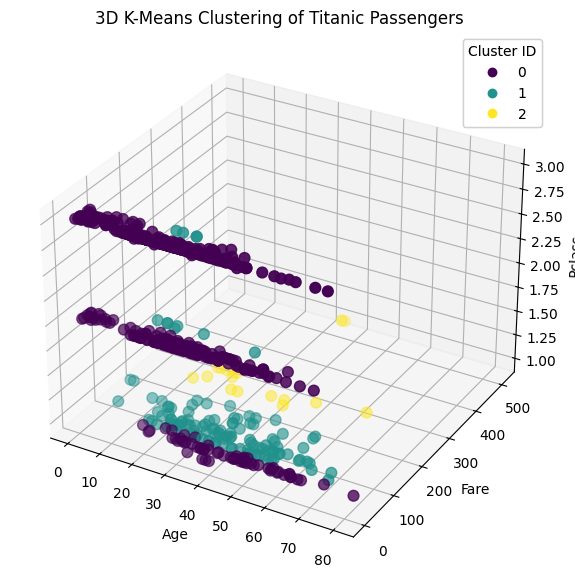

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

titanic = sns.load_dataset("titanic")

features = titanic[['age', 'fare', 'pclass']].dropna()


kmeans = KMeans(n_clusters=3, random_state=0)
features['cluster_id'] = kmeans.fit_predict(features)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    features['age'],
    features['fare'],
    features['pclass'],
    c=features['cluster_id'],
    cmap='viridis',
    s=60
)

ax.set_title('3D K-Means Clustering of Titanic Passengers')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Pclass')

legend1 = ax.legend(*scatter.legend_elements(), title="Cluster ID")
ax.add_artist(legend1)

plt.show()


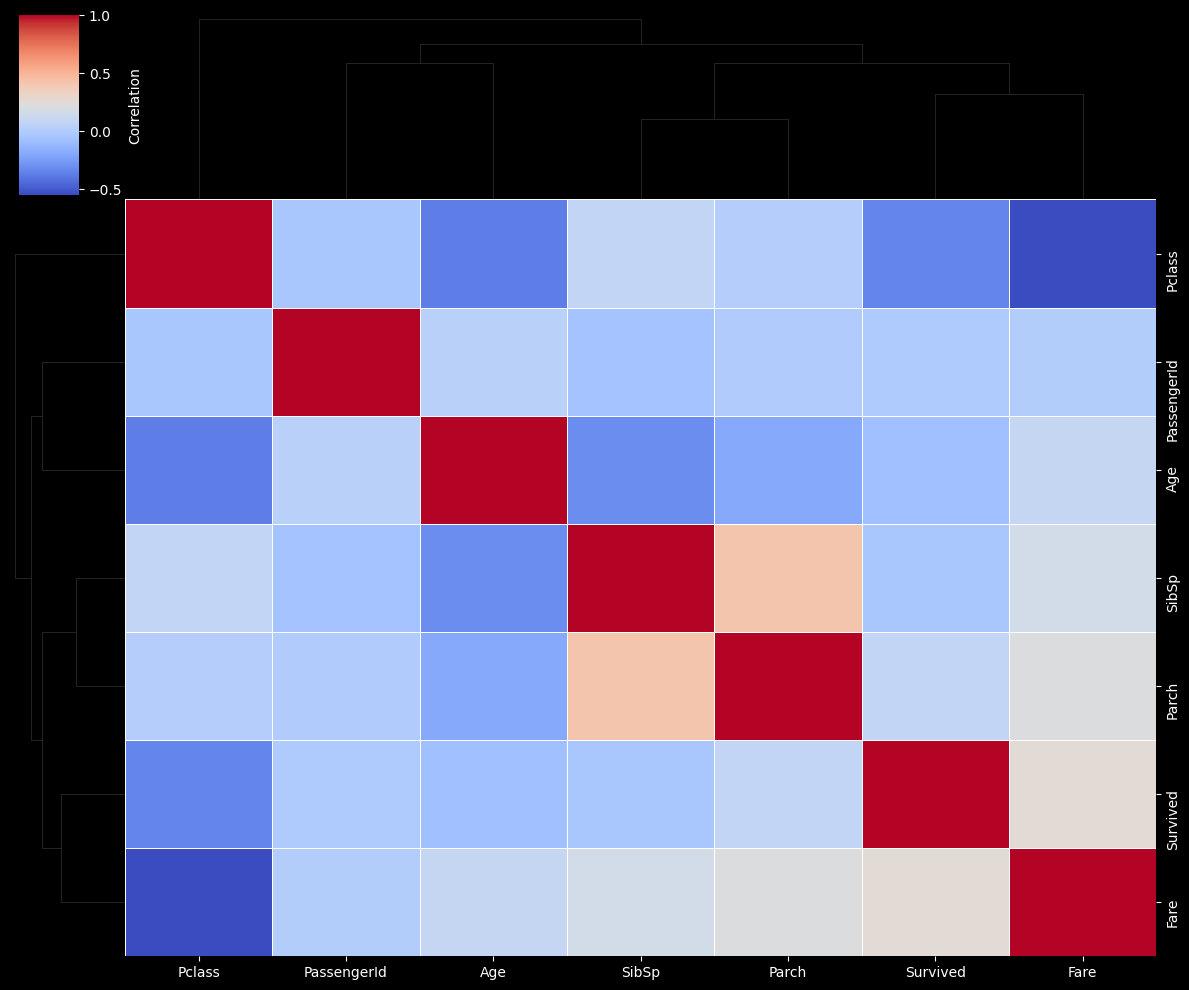

In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('titanic (1).csv')  # Update with actual path

# Check for numeric columns only
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Set up black background for plots
plt.style.use('dark_background')

# Compute the correlation matrix
corr = df_numeric.corr()

# Create a clustered heatmap
sns.clustermap(corr, cmap='coolwarm', linewidths=0.5, figsize=(12, 10), cbar_kws={'label': 'Correlation'},
               dendrogram_ratio=(.1, .2), colors_ratio=0.03)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('titanic (1).csv')

print(df.isnull().sum())

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) # Changed 'embarked' to 'Embarked'
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df.drop(columns=['deck'], inplace=True)

df['survival_status'] = df['survived'].map({0: 'Did not survive', 1: 'Survived'})

print(df.head(3))

print("Survival Count:")
print(df['survived'].value_counts())

print("\nSurvival Rate by Sex:")
print(df.groupby('sex')['survived'].value_counts())

print("\nSurvival Rate by Class:")
print(df.groupby('pclass')['survived'].value_counts())


plt.style.use('dark_background')
sns.set_context("talk")

plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='Fare', data=df, palette='Set2')

plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.xticks([0, 1], ['Did not Survive', 'Survived'])

plt.show()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<ipython-input-94-7632d99cd42e>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-94-7632d99cd42e>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

KeyError: 'embark_town'

In [ ]:
df = sns.load_datasets('tips')

bill, tip, sex, smoker, day, time
task [ predict tip, analyze behavior]

categorical plots, violin plot, regression plot, heatmap, scatter and box plot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = sns.load_dataset('tips')

# Preview data
print(df.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


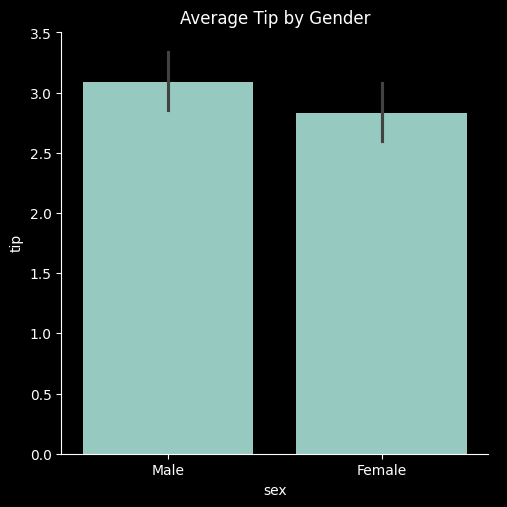

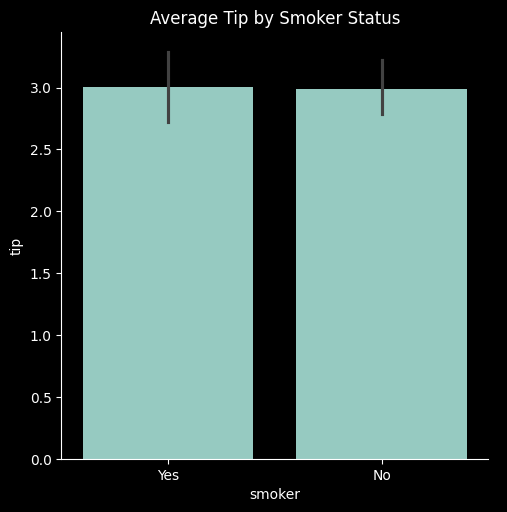

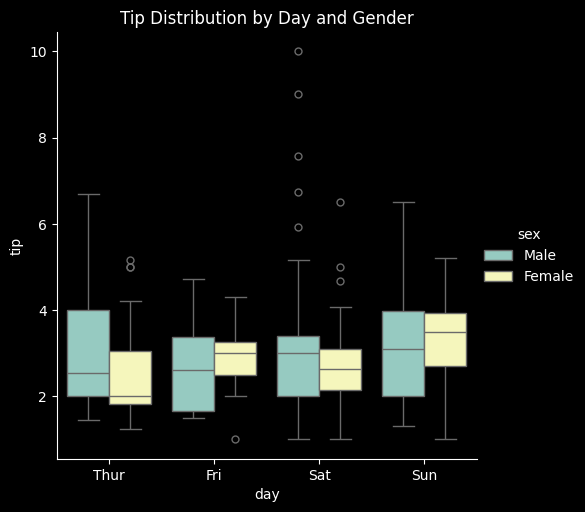

In [ ]:
# Categorical behavior: Tip amount by sex, smoker status, day, time
sns.catplot(x='sex', y='tip', kind='bar', data=df)
plt.title("Average Tip by Gender")
plt.show()

sns.catplot(x='smoker', y='tip', kind='bar', data=df)
plt.title("Average Tip by Smoker Status")
plt.show()

sns.catplot(x='day', y='tip', hue='sex', kind='box', data=df)
plt.title("Tip Distribution by Day and Gender")
plt.show()


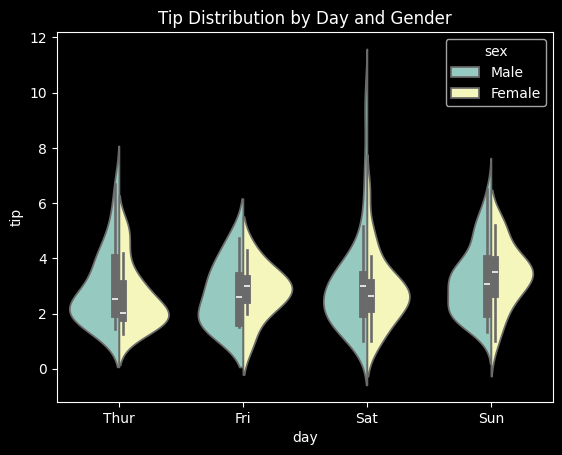

In [ ]:
sns.violinplot(x='day', y='tip', hue='sex', data=df, split=True)
plt.title("Tip Distribution by Day and Gender")
plt.show()


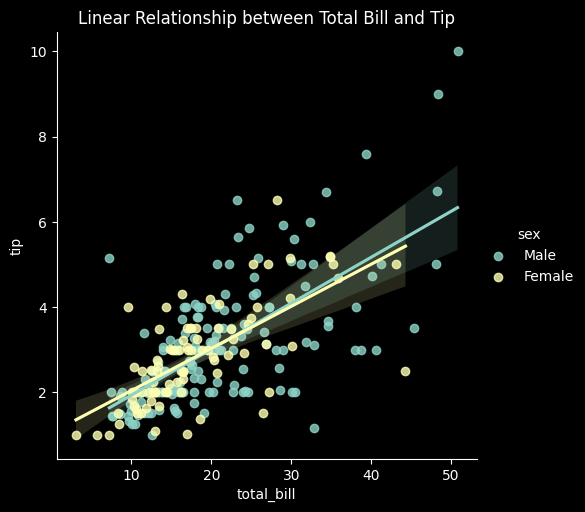

In [ ]:
sns.lmplot(x='total_bill', y='tip', hue='sex', data=df)
plt.title("Linear Relationship between Total Bill and Tip")
plt.show()


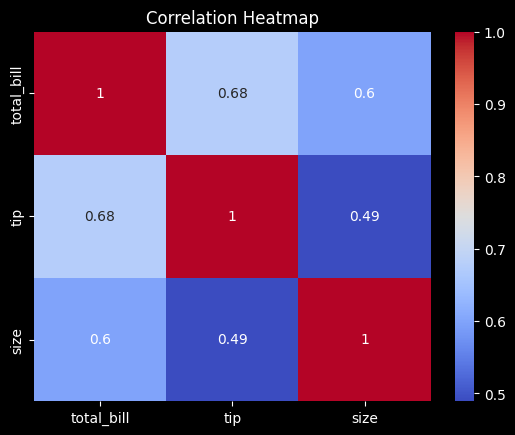

In [ ]:
# Only numerical columns
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


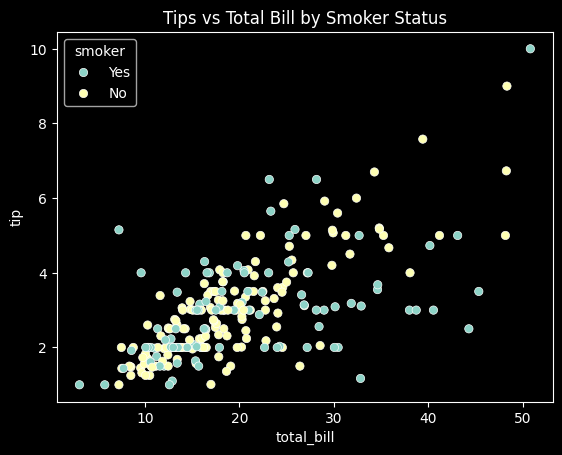

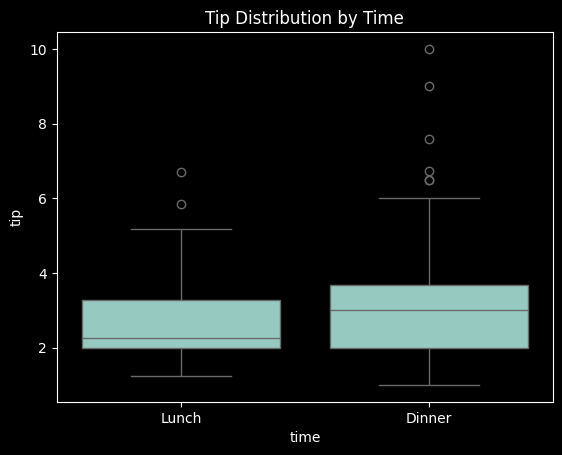

In [ ]:
# Scatter plot with hue
sns.scatterplot(x='total_bill', y='tip', hue='smoker', data=df)
plt.title("Tips vs Total Bill by Smoker Status")
plt.show()

# Box plot: Tip by Time
sns.boxplot(x='time', y='tip', data=df)
plt.title("Tip Distribution by Time")
plt.show()
